Nama : Wahyu Krisna Aji

Dataset : Shoe vs Sandal vs Boot Image Dataset (15K Images)

Source : Kaggle

Link : https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

In [15]:
import os
import zipfile
import glob

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

from keras.preprocessing import image
import pandas as pd
# from google.colab import files
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
%matplotlib inline

In [ ]:
file_name = 'archive.zip'
extract_file = zipfile.ZipFile(file_name, 'r')
extract_file.extractall('/alas-kaki')
extract_file.close()

In [2]:
main_repo = "/alas-kaki/Shoe vs Sandal vs Boot Dataset"

In [3]:
list_main_repo = os.listdir(main_repo)
list_main_repo

['Boot', 'Sandal', 'Shoe']

In [4]:
sandal_repo = os.path.join(main_repo, 'Sandal')
shoe_repo = os.path.join(main_repo, 'Shoe')
boot_repo = os.path.join(main_repo, 'Boot')

In [5]:
total_sandal = len(os.listdir(sandal_repo))
total_shoe = len(os.listdir(shoe_repo))
total_boot = len(os.listdir(boot_repo))

In [6]:
print("Total Sandal    : ", total_sandal)
print("Total Shoe   : ", total_shoe)
print("Total Boot   : ", total_boot)

Total Sandal    :  5000
Total Shoe   :  5000
Total Boot   :  5000


In [8]:
training_data = ImageDataGenerator(
    rotation_range = 30,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = 0.2
)

validation_data = ImageDataGenerator(
    rotation_range = 30,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = 0.2
)

In [9]:
generator_training_data = training_data.flow_from_directory(
    main_repo,
    target_size = (136,102),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 128,
    shuffle = True,
    subset = "training"
)

generator_validation_data = validation_data.flow_from_directory(
    main_repo,
    target_size = (136,102),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 128,
    shuffle = False,
    subset = "validation"
)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [10]:
Image_Model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(136,102, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.5),  
    Conv2D(64, (3,3), activation='relu'), 
    MaxPooling2D(2,2),
    Dropout(0.5),  
    Flatten(), 
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

In [11]:
Adam(learning_rate=0.00146, name='Adam')
Image_Model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [12]:

class newCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9):
      print("Akurasi telah tercapai!")
      self.model.stop_training = True

cb = newCallbacks()

In [13]:
Image_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 134, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 67, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 48, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 24, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 22, 64)        1

In [14]:
model_hist = Image_Model.fit(
    generator_training_data,
    validation_data=generator_validation_data,
    epochs=50,
    verbose=2,
    batch_size=128,
    callbacks=[cb]
)

Epoch 1/50
94/94 - 518s - loss: 0.9272 - accuracy: 0.5440 - val_loss: 0.8231 - val_accuracy: 0.6280 - 518s/epoch - 6s/step
Epoch 2/50
94/94 - 561s - loss: 0.6000 - accuracy: 0.7374 - val_loss: 0.6074 - val_accuracy: 0.7690 - 561s/epoch - 6s/step
Epoch 3/50
94/94 - 403s - loss: 0.4869 - accuracy: 0.7938 - val_loss: 0.5798 - val_accuracy: 0.7690 - 403s/epoch - 4s/step
Epoch 4/50
94/94 - 449s - loss: 0.4191 - accuracy: 0.8227 - val_loss: 0.4902 - val_accuracy: 0.8467 - 449s/epoch - 5s/step
Epoch 5/50
94/94 - 641s - loss: 0.3659 - accuracy: 0.8522 - val_loss: 0.3811 - val_accuracy: 0.8853 - 641s/epoch - 7s/step
Epoch 6/50
94/94 - 393s - loss: 0.3221 - accuracy: 0.8718 - val_loss: 0.3756 - val_accuracy: 0.8840 - 393s/epoch - 4s/step
Epoch 7/50
94/94 - 373s - loss: 0.3069 - accuracy: 0.8793 - val_loss: 0.3430 - val_accuracy: 0.8630 - 373s/epoch - 4s/step
Epoch 8/50
94/94 - 368s - loss: 0.2737 - accuracy: 0.8948 - val_loss: 0.2561 - val_accuracy: 0.9157 - 368s/epoch - 4s/step
Epoch 9/50
Akura

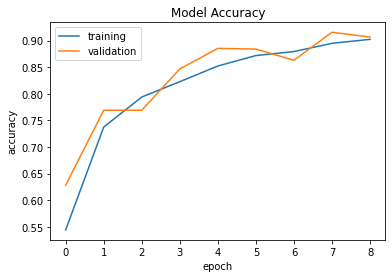

In [16]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

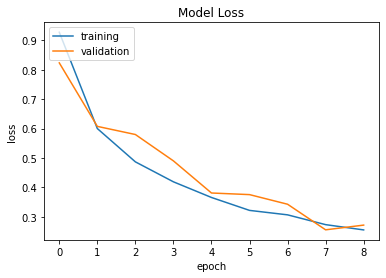

In [17]:
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [20]:
# Membuat model dengan format pb
export_repo = 'saved_model/'
tf.saved_model.save(Image_Model, export_repo)
 
# Konversi model pb ke tflite
model_converter = tf.lite.TFLiteConverter.from_saved_model(export_repo)
tflite_converted_model = model_converter.convert()
 
with open('sandal.tflite', 'wb') as f:
  f.write(tflite_converted_model)

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets
